In [1]:
from config import *
import processing
import models
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torch
import json



In [ ]:
processing.preprocess_midi_files('F:\\GitHub\\dataset\\midi_dataset', 'F:\\GitHub\\dataset\\np_dataset')

 [F:\GitHub\dataset\midi_dataset\2_Unlimited\Get_Ready_for_This.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Here_I_Go.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.2.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.3.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Maximum_Overdrive.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Maximum_Overdrive.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit.2.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limits.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit_extended_.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_One.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_

C:\Users\Draco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


 [F:\GitHub\dataset\midi_dataset\Billy_Joel\Movin_Out_Anthonys_Song_.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\My_Life.1.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\My_Life.2.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\My_Life.3.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\My_Life.4.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\My_Life.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\New_York_State_of_Mind.1.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\New_York_State_of_Mind.2.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\New_York_State_of_Mind.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Nocturne.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Only_the_Good_Die_Young.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Piano_Man.1.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Piano_Man.2.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Piano_Man.3.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Piano_Man.4.mid] [F:\GitHub\dataset\midi_dataset\Billy_Joel\Piano_Man

In [2]:
train_dataloader, test_dataloader = processing.get_train_test_dataloaders('F:\\GitHub\\dataset\\np_dataset')


In [42]:
with open('F:\\GitHub\\dataset\\midi_dataset\\tokenizations.json', 'r') as f:
    tokenizations = json.load(f)
METADATA_VOCAB_SIZE = tokenizations['VOCAB_SIZE']
model = models.SimpleTransformer(VOCAB_SIZE, METADATA_VOCAB_SIZE, N_EMBD, N_HEAD, N_LAYER, FEEDFORWARD_DIM, BLOCK_SIZE, DROPOUT, DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop
num_epochs = EPOCHS
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        # Forward pass
        output = model(src, metadata)
        # print(output.shape)
        # Reshape output and target for loss calculation
        output = output.reshape(-1, VOCAB_SIZE)  # Flatten the output to [batch_size * seq_len, vocab_size]
        trg = trg.view(-1)  # Flatten the target to [batch_size * seq_len]

        # Compute loss
        loss = criterion(output, trg)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        if (batch_idx + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    with torch.no_grad():
        for src, trg, metadata in test_dataloader:
            src, trg = src.to(DEVICE), trg.to(DEVICE)
            output = model(src, metadata)
            output = output.reshape(-1, VOCAB_SIZE)
            trg = trg.view(-1)
            val_loss += criterion(output, trg).item()
    
    avg_val_loss = val_loss / len(test_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}')

print("Training complete!")

Epoch [1/200], Average Loss: 5.8584
Epoch [1/200], Validation Loss: 6.2522
Epoch [2/200], Average Loss: 5.3833
Epoch [2/200], Validation Loss: 6.0378


KeyboardInterrupt: 

In [77]:
for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        # Forward pass
        output = model(src, metadata)
        

<BarContainer object of 1485 artists>

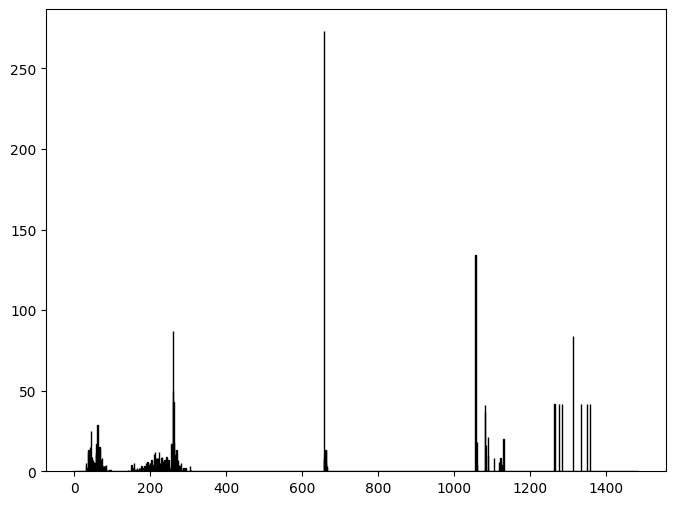

In [89]:
flattened_tensor = src.flatten()
bins = VOCAB_SIZE
hist = torch.histc(flattened_tensor.int(), bins=bins, min=0, max=VOCAB_SIZE)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(bins), hist.cpu().int().numpy(), width=1, align='center', color='blue', edgecolor='black')
